# Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import seaborn as sns

In [2]:
df = pd.read_csv('/content/data.csv')
print(df.shape) # 400 input-output combinations for the total dataset
df.head(df.shape[0])

(400, 3)


,X,Y,LABEL
0,79,-9,4
1,71,-17,3
2,-21,85,4
3,47,-51,2
4,95,-61,3
...,...,...,...
395,-42,43,2
396,-99,65,1
397,-44,30,2
398,-71,10,0


In [3]:
# a function for 1-hot encoding the output labels

def normalize(input):
  if input == 0:
    return [1,0,0,0,0]
  elif input == 1:
    return [0,1,0,0,0]
  elif input == 2:
    return [0,0,1,0,0]
  elif input == 3:
    return [0,0,0,1,0]
  elif input == 4:
    return [0,0,0,0,1]

In [4]:
X1 = df["X"].values.tolist()
X2 = df["Y"].values.tolist()
Y = df["LABEL"].values.tolist()

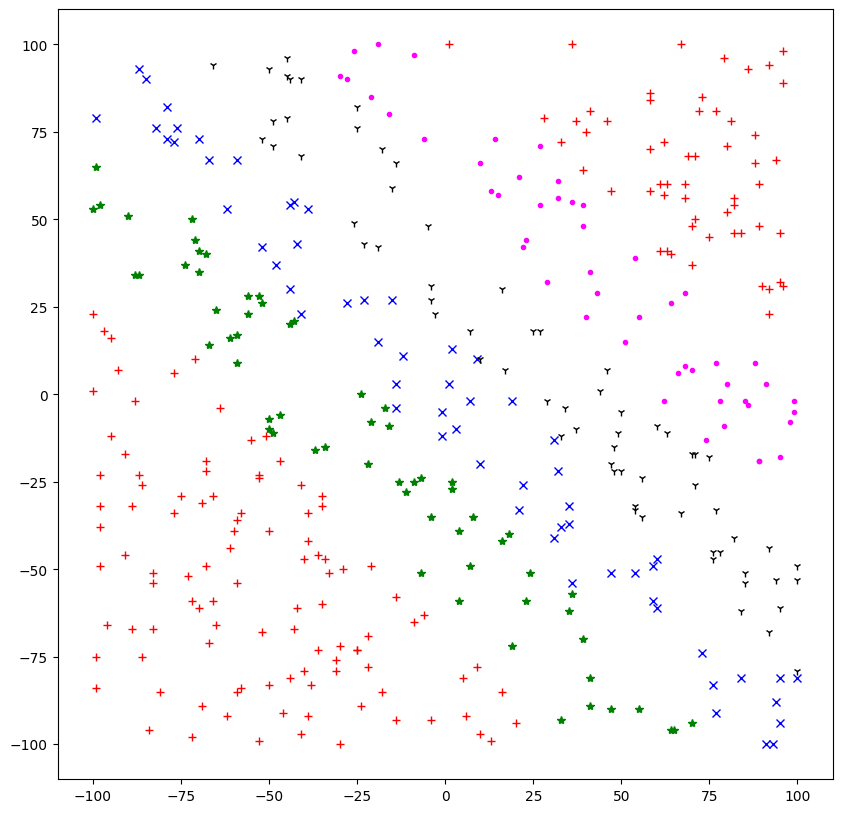

In [6]:
# plotting all points

plt.figure(figsize=(10,10))
for i in range(len(Y)):
    if Y[i] == 0:
        plt.plot(X1[i], X2[i], c="red", marker="+")
    elif Y[i] == 1:
        plt.plot(X1[i], X2[i], c="green", marker="*")
    elif Y[i] == 2:
        plt.plot(X1[i], X2[i], c="blue", marker="x")
    elif Y[i] == 3:
        plt.plot(X1[i], X2[i], c="black", marker="1")
    elif Y[i] == 4:
        plt.plot(X1[i], X2[i], c="magenta", marker=".")
plt.show()

In [ ]:
features = list(zip(X1, X2)) #zipping the 2 input features into a list

features_np = np.array(features) #converting the list into a numpy array

In [ ]:
 # normalizing the output labels to be one-hot encoded and
 # turning it into a numpy array

Y2 = np.array([normalize(i) for i in Y])

In [ ]:
# dividing the total set into training (300) & testing (100) sets

features_train = features_np[:300]
Y2_train = Y2[:300]

features_test = features_np[300:]
Y2_test = Y2[300:]

# Neural Network - Training & testing

In [ ]:
class NeuralNetwork(object):
    def __init__(self, inputLayerNeurons = 2, hidden1LayerNeurons = 20, hidden2LayerNeurons = 20, hidden3LayerNeurons = 20, outLayerNeurons = 5, learning_rate = 0.01, activation_type: str = 'sigmoid'):

        self.activation_type = activation_type
        self.learning_rate = learning_rate

        # random weight initialization
        self.W_H1I = np.random.randn(inputLayerNeurons, hidden1LayerNeurons)
        self.W_H2H1 = np.random.randn(hidden1LayerNeurons, hidden2LayerNeurons)
        self.W_H3H2 = np.random.randn(hidden2LayerNeurons, hidden3LayerNeurons)
        self.W_OH3 = np.random.randn(hidden3LayerNeurons, outLayerNeurons)

        # random bias initialization
        self.biases = [
            np.random.randn(hidden1LayerNeurons),
            np.random.randn(hidden2LayerNeurons),
            np.random.randn(hidden3LayerNeurons),
            np.random.randn(outLayerNeurons)
        ]

    def activation(self, x, der=False):
        if self.activation_type == 'sigmoid':
            if der == True:
                return np.exp(-x) / (1 + np.exp(-x))**2 # return x * (1-x)
            else:
                return 1 / (1 + np.exp(-x)) # 1 / (1 + e^-x)

        if self.activation_type == "tanh":
            if der == True:
                return 1 - (np.tanh(x))**2 # 1 - (tanh(x))^2
            else:
                return np.tanh(x)

        if self.activation_type == "relu":
            if der == True:
                return np.where(x > 0, 1, 0)
            else:
                return np.maximum(0, x)

        if self.activation_type == "gaussian":
            if der == True:
                return -(2 * x * np.exp(-x**2)) # -2xe^(-x^2)
            else:
                return np.exp(-x**2)  # e^(-x^2)

    def feedForward(self, X):
        hidden1_input = np.dot(X, self.W_H1I) + self.biases[0]
        self.hidden1_output = self.activation(hidden1_input)

        hidden2_input = np.dot(self.hidden1_output, self.W_H2H1) + self.biases[1]
        self.hidden2_output = self.activation(hidden2_input)

        hidden3_input = np.dot(self.hidden2_output, self.W_H3H2) + self.biases[2]
        self.hidden3_output = self.activation(hidden3_input)

        output_input = np.dot(self.hidden3_output, self.W_OH3) + self.biases[3]
        pred = self.activation(output_input)
        return pred

    def backPropagation(self, X, Y, pred):
        output_error = Y - pred
        output_delta = self.learning_rate * output_error * self.activation(pred, der=True)

        hidden3_error = output_delta.dot(self.W_OH3.T)
        hidden3_delta = self.learning_rate * hidden3_error * self.activation(self.hidden3_output, der=True)

        hidden2_error = hidden3_delta.dot(self.W_H3H2.T)
        hidden2_delta = self.learning_rate * hidden2_error * self.activation(self.hidden2_output, der=True)

        hidden1_error = hidden2_delta.dot(self.W_H2H1.T)
        hidden1_delta = self.learning_rate * hidden1_error * self.activation(self.hidden1_output, der=True)

        self.W_H1I += X.T.dot(hidden1_delta)
        self.W_H2H1 += self.hidden1_output.T.dot(hidden2_delta)
        self.W_H3H2 += self.hidden2_output.T.dot(hidden3_delta)
        self.W_OH3 += self.hidden3_output.T.dot(output_delta)

        self.biases[0] += self.learning_rate * np.sum(hidden1_delta, axis=0)
        self.biases[1] += self.learning_rate * np.sum(hidden2_delta, axis=0)
        self.biases[2] += self.learning_rate * np.sum(hidden3_delta, axis=0)
        self.biases[3] += self.learning_rate * np.sum(output_delta, axis=0)

    def train(self, X, Y):
        output = self.feedForward(X)
        self.backPropagation(X,Y,output)

Epoch: 0, error: 0.1838671218569071
Epoch: 10000, error: 0.08461287282959457
Epoch: 20000, error: 0.07966109312808749
Epoch: 30000, error: 0.07714383624506178
Epoch: 40000, error: 0.07595887403985511
Epoch: 50000, error: 0.07513959224074082
Epoch: 60000, error: 0.07590801174640147
Epoch: 70000, error: 0.07445484196634537
Epoch: 80000, error: 0.07054116530142183
Epoch: 90000, error: 0.0675729010819032


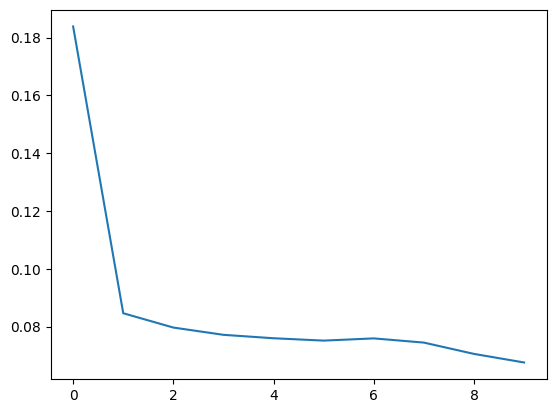

In [ ]:
NN = NeuralNetwork(activation_type = 'sigmoid')
#NN = NeuralNetwork(activation_type ='tanh')
#NN = NeuralNetwork(activation_type = 'gaussian')
#NN = NeuralNetwork(activation_type = 'relu')

err_list = []

for i in range(100000):
    NN.train(features_train,Y2_train)
    err = np.mean(np.square(Y2_train - NN.feedForward(features_train)))

    if i % 10000 == 0:
      err_list.append(err)
      print(f'Epoch: {i}, error: {err}')

plt.plot(err_list)
plt.show()

In [ ]:
# stores a dict with the probability of each class with its class name

def getProb(pred):
    return {f'Class-{index}': p*100 for index, p in enumerate(pred)}

In [ ]:
# returns the dict key with the highest probablity

def getClass(dict):
  max_key = max(dict, key=dict.get)
  return (max_key)

In [ ]:
# testing a random input

pred = NN.feedForward([75,-33])
print(pred)
print(getProb(pred))
print(getClass(getProb(pred)))

[5.47814236e-03 6.11883112e-06 5.83560084e-02 9.37782751e-01
 5.27789296e-03]
{'Class-0': 0.5478142356555454, 'Class-1': 0.0006118831123081037, 'Class-2': 5.835600838468434, 'Class-3': 93.77827508010994, 'Class-4': 0.527789295528783}
Class-3


# Performance Metrics

In [ ]:
predictions = NN.feedForward(features_test)
#print(f"Predictions: {predictions}")

# Calculate recall and F1 score
Y_true = np.argmax(Y2_test, axis=1)
Y_pred = np.argmax(predictions, axis=1)

accuracy = accuracy_score(Y_true, Y_pred)
print(f"Overall Accuracy: {accuracy}")

precision = precision_score(Y_true, Y_pred, average=None)
print("Precision for each class:")
for i, score in enumerate(precision):
    print(f"Class {i}: {score}")

recall = recall_score(Y_true, Y_pred, average='macro')
print(f"Recall: {recall}")

f1 = f1_score(Y_true, Y_pred, average='macro')
print(f"F1 Score overall: {f1}")

Overall Accuracy: 0.77
Precision for each class:
Class 0: 0.7804878048780488
Class 1: 0.5294117647058824
Class 2: 0.9333333333333333
Class 3: 0.8666666666666667
Class 4: 0.75
Recall: 0.745878955878956
F1 Score overall: 0.7498162527128044


In [ ]:
# f1 score fr each class

f1_scores = f1_score(Y_true, Y_pred, average=None)

print("F1 Scores for each class:")
for i, score in enumerate(f1_scores):
    print(f"Class {i}: {score}")

F1 Scores for each class:
Class 0: 0.8205128205128206
Class 1: 0.6206896551724139
Class 2: 0.8
Class 3: 0.7878787878787877
Class 4: 0.7199999999999999


# Documentation

**Modifications made:**

1. `outLayerNeurons` value changed from 1 to `5` for accomodating 5 seperate classes.
2. Added a variable to hold the 2nd and 3rd hidden layer neuron counts: `hidden2LayerNeurons` & `hidden2LayerNeurons` respectively.
3. Additional 2 weight matrices were introduced to handle the weights between Hidden1-Hidden2 & Hidden2-Hidden3 connections: `W_H2H1`, `W_H3H2`.
4. For handling biases a `biases` list was constructed, which contained lists of varying sizes, where the sizes vary with the number of neurons in each layer.
5. Added 3 more activation functions, `tanh`, `reLU` & `gaussian` for testing purposes. reLU proved the least effective due to out dataset having a huge amount of negatice input features.
6. During forward propagation, 4 new calculated terms were needed, `hidden2_input`, `hidden2_output`, `hidden3_input`, `hidden3_output`. These were added for the additional 2 hidden layers to the network.
7. In the same way, during backpropagation, `hidden3_error`, `hidden2_error`, `hidden3_delta`, `hidden2_delta` were introduced.
8. Due to our new addition of baises, they also needed to be adjusted accordingly.

**Challenges**:

1. Adding 2 additional layers to the model required extra calculations and code to be implemented which proved to be difficult at the time.
2. Calculating the backpropagation formula along with the weight, bias adjustments lead to mistakes during the initial stages but were soon remedied.

# Result & Analysis

In [ ]:
# confusion matrix

def conf(Y_true, Y_pred, c = 'magma'):
    conf_matrix = confusion_matrix(Y_true, Y_pred)
    print("Confusion Matrix:")
    print(conf_matrix)

    # Plotting
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=c)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

In [ ]:
# ROC graph

def roc_plot(Y2_test, Y_pred):
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(Y2_test.shape[1]):
        fpr[i], tpr[i], _ = roc_curve(Y2_test[:, i], Y_pred[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    #ROC curve for each class
    for i in range(Y2_test.shape[1]):
        plt.plot(fpr[i], tpr[i], label=f'Class {i} (area = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

In [ ]:
predictions = NN.feedForward(features_test)

Y_true = np.argmax(Y2_test, axis=1)
Y_pred = np.argmax(predictions, axis=1)

Confusion Matrix:
[[32  4  0  0  1]
 [ 3  9  0  0  0]
 [ 0  4 14  2  0]
 [ 2  0  1 13  2]
 [ 4  0  0  0  9]]


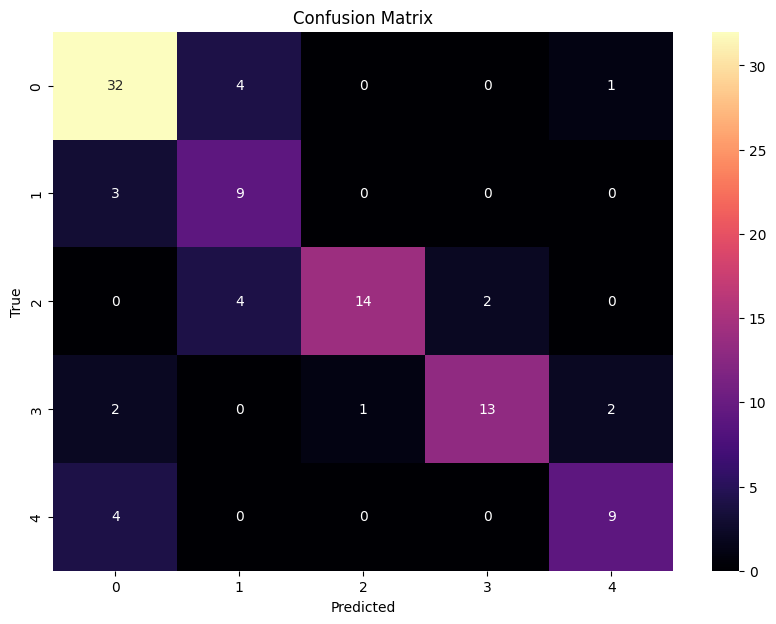

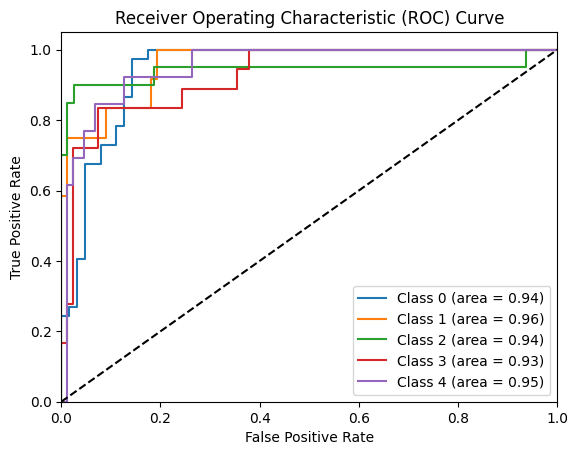

In [ ]:
conf(Y_true, Y_pred)

print()

roc_plot(Y2_test, predictions)

In [ ]:
NN_1 = NeuralNetwork(inputLayerNeurons = 2, hidden1LayerNeurons = 60, hidden2LayerNeurons = 60, hidden3LayerNeurons = 60, outLayerNeurons = 5, learning_rate = 0.001, activation_type= 'sigmoid')

for i in range(100000):
    NN_1.train(features_train,Y2_train)
    err = np.mean(np.square(Y2_train - NN_1.feedForward(features_train)))

    if i % 10000 == 0:
      err_list.append(err)
      print(f'Epoch: {i}, error: {err}')

Epoch: 0, error: 0.32693916229729053
Epoch: 10000, error: 0.07218875664234843
Epoch: 20000, error: 0.0682502734565452
Epoch: 30000, error: 0.06600132631562448
Epoch: 40000, error: 0.06445787155017488
Epoch: 50000, error: 0.06327762111330175
Epoch: 60000, error: 0.0623043733310183
Epoch: 70000, error: 0.06146285961959173
Epoch: 80000, error: 0.060713988882160515
Epoch: 90000, error: 0.06003546815075589


In [ ]:
predictions1 = NN_1.feedForward(features_test)

Y_true1 = np.argmax(Y2_test, axis=1)
Y_pred1 = np.argmax(predictions1, axis=1)

Confusion Matrix:
[[32  4  0  0  1]
 [ 3  9  0  0  0]
 [ 0  2 17  1  0]
 [ 0  0  2 13  3]
 [ 4  0  0  0  9]]


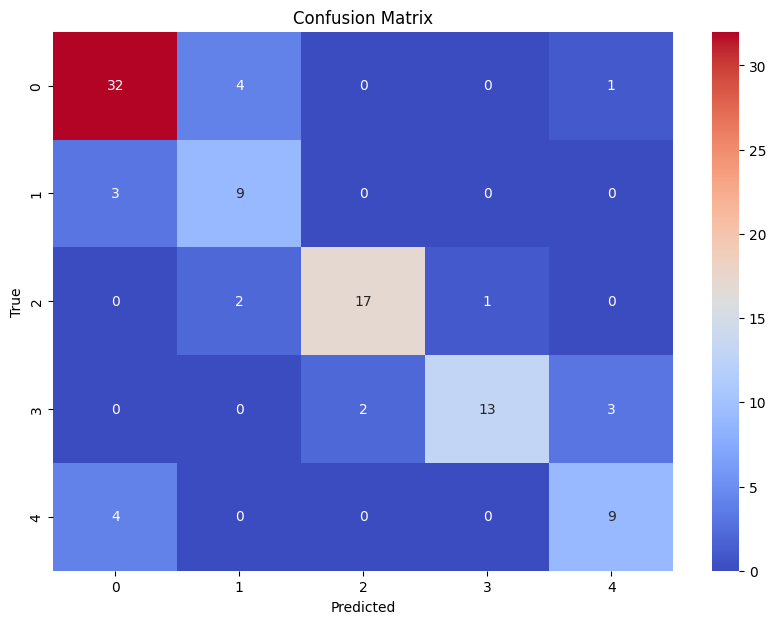

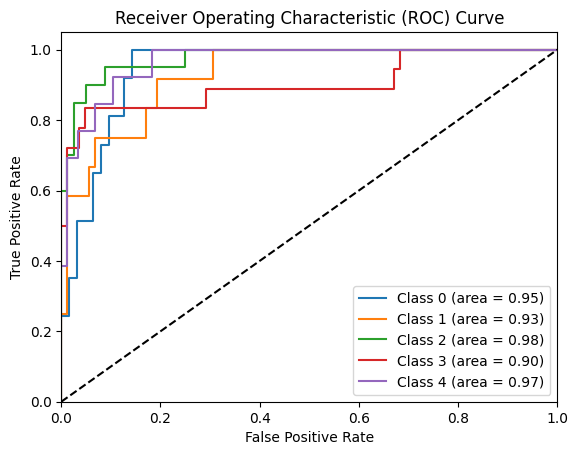

In [ ]:
conf(Y_true1, Y_pred1, 'coolwarm')

print()

roc_plot(Y2_test, predictions1)

In [ ]:
accuracy = accuracy_score(Y_true1, Y_pred1)
print(f"Overall Accuracy: {accuracy}")

precision = precision_score(Y_true1, Y_pred1, average=None)
print("Precision for each class:")
for i, score in enumerate(precision):
    print(f"Class {i}: {score}")

recall = recall_score(Y_true1, Y_pred1, average='macro')
print(f"Recall: {recall}")

f1 = f1_score(Y_true1, Y_pred1, average='macro')
print(f"F1 Score overall: {f1}")

Overall Accuracy: 0.8
Precision for each class:
Class 0: 0.8205128205128205
Class 1: 0.6
Class 2: 0.8947368421052632
Class 3: 0.9285714285714286
Class 4: 0.6923076923076923
Recall: 0.7758789558789558
F1 Score overall: 0.7770748987854251


Here it can be observed that after training the model again on the same train-test split, but with different number of neurons in the hidden layers, the overall accuracy slightly increased from `77%` to `80%`. This may be due to the dataset being verry little and the overall pattern withing the data being very simple.

# Conclusion

**Summary:**

Overall, our 3-hidden layer neural network was able to classify the input into 5 seperate classes with recall and F1 scores of above 0.74, when all hidden layers had 20 neurons each. The total accuracy achieved was 77% using only sigmoid as the activation. Our dataset was very small, with a training set of 300 combinations and 100 for testing.

**Challenges & Achievements**

Despite the simple dataset, the model may have been overfitted due to using too many neurons in the hidden layers and hence the accuracy may be low for testing data. By adjusting the learning rate and internel parameters, the model may perform better for larger datasets. As our dataset consisted of both negative and positive integers, tanh and sigmoid activations will perform the best as both of them limit the output to either [0, 1] or the [-1, 1] range. In this assignment we used sigmoid, as tanh had fluctuations in its total erros during training. Moreover since our output labels were 1-hot encoded, sigmoid performed decently.

**Improvements:**

Rather than implementing simple patterns similar to our custom data, this model can also be used to classify images belonging to different classes. Since, images are stored as pixel values during runtime, we can use ReLU as the activation function, since pixels only have values in the range [0, 255]. ReLU is already implemented in the model but it performs poorly for our dataset due to us having negative values input features. Both learning rate and the hidden layer neuron counts can be experimented with to achieve the perfect balance  